In [53]:
import numpy as np
import matplotlib.pyplot as plt

from librosa.display import specshow
from IPython.display import Audio

from birdclef import Dataset, SummaryStatistics
from birdclef import FeaturePipeline
from birdclef import ConstellationMap, Fingerprint

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### load data

In [2]:
dataset = Dataset.load(Dataset.PATH)
summary = SummaryStatistics(dataset)

### basic summary statistics

In [3]:
summary.num_samples()

16941

In [4]:
label_counts = summary.label_counts()
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

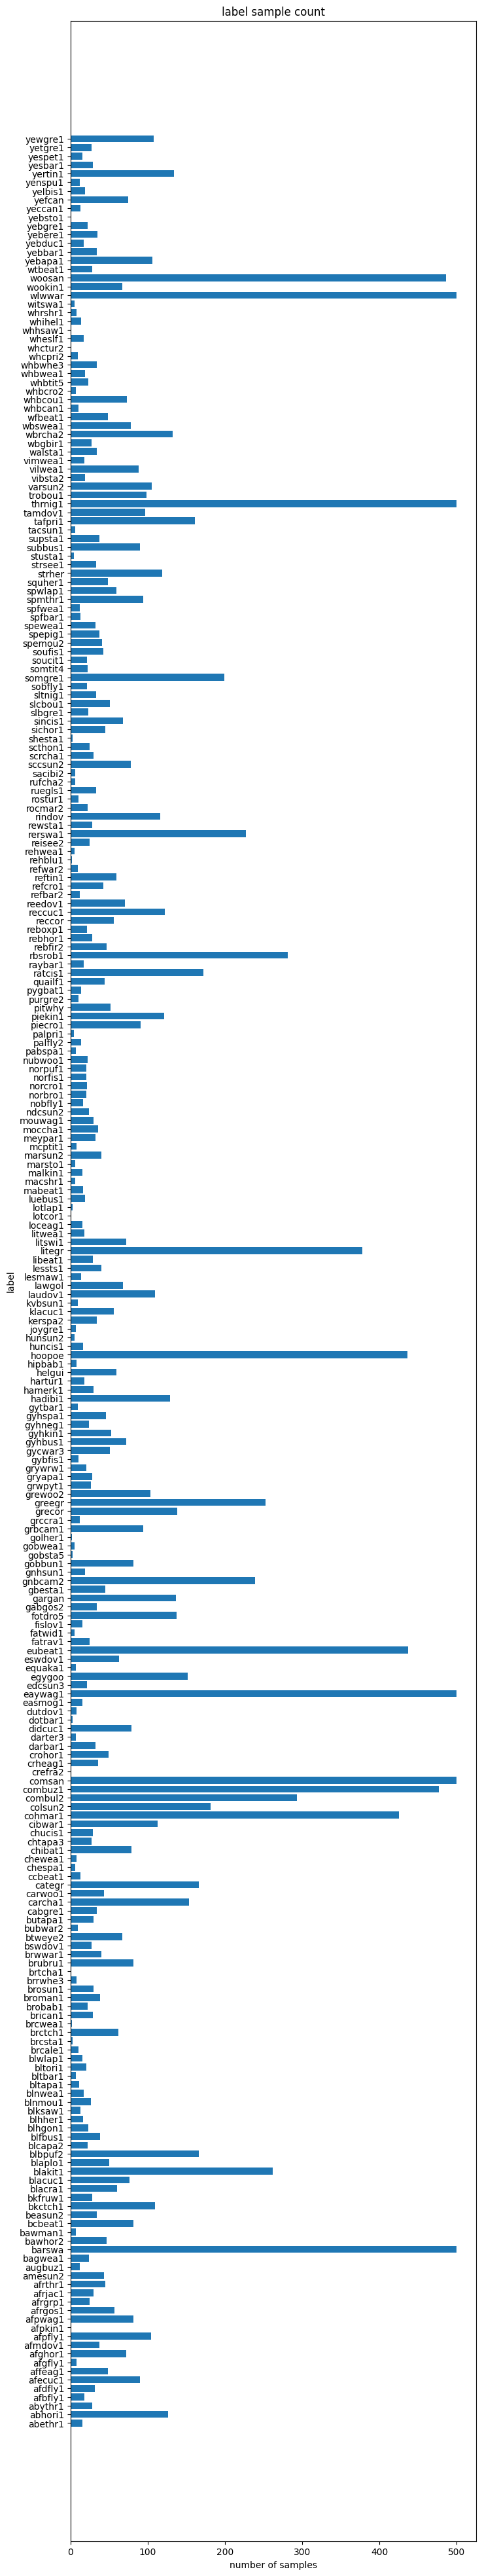

In [5]:
fig, ax = plt.subplots(figsize=(8, 50))
ax.barh(labels, counts)

ax.set_title("label sample count")
ax.set_xlabel("number of samples")
ax.set_ylabel("label")

plt.show()

In [6]:
audio_sample_counts = summary.audio_sample_counts()

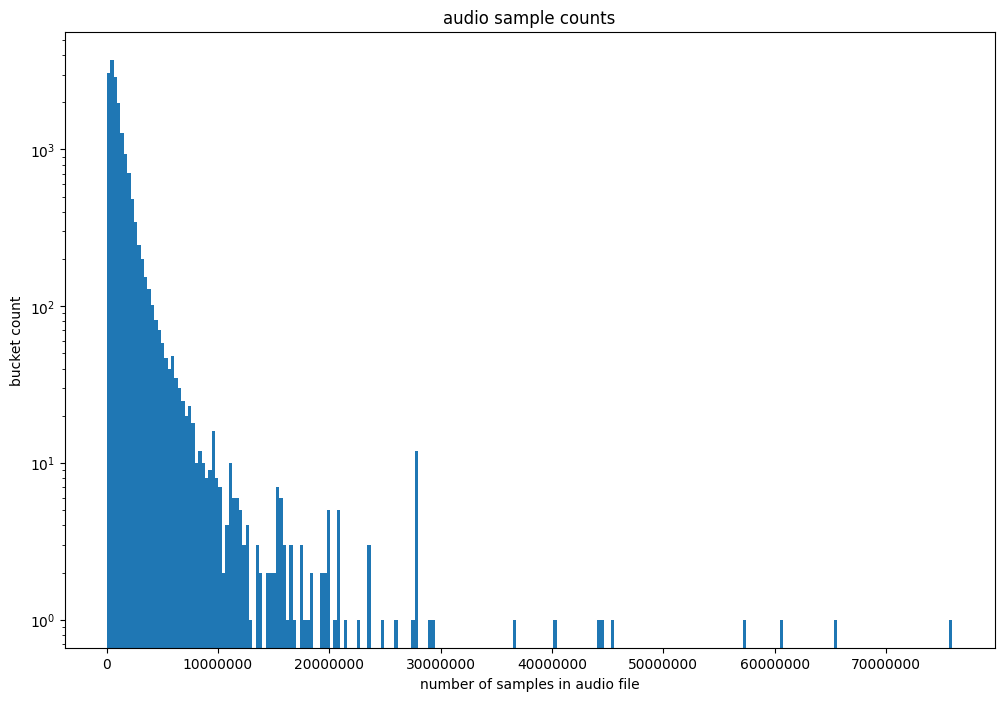

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_sample_counts, bins=250, log=True)

ax.set_title("audio sample counts")
ax.set_xlabel("number of samples in audio file")
ax.set_ylabel("bucket count")
ax.ticklabel_format(style="plain", useOffset=False, axis="x") 

plt.show()

### pick a random sample and analyse its audio

In [8]:
random = dataset.pick_random()
audio_samples = np.array(random.audio_samples(Dataset.SAMPLE_RATE))

In [9]:
random.audio_file_path

'/media/william/Scratch/datasets/birdclef-2023/train_audio/wtbeat1/XC648153.ogg'

In [10]:
Audio(random.audio_file_path)

In [11]:
len(audio_samples)

2725632

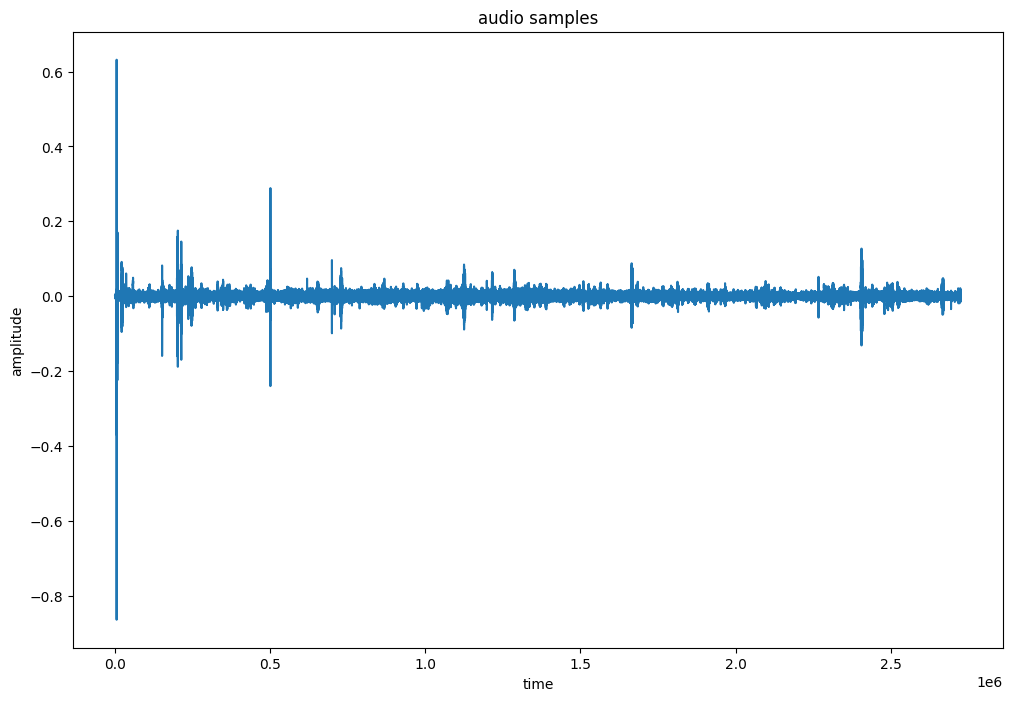

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(audio_samples)

ax.set_title("audio samples")
ax.set_xlabel("time")
ax.set_ylabel("amplitude")

plt.show()

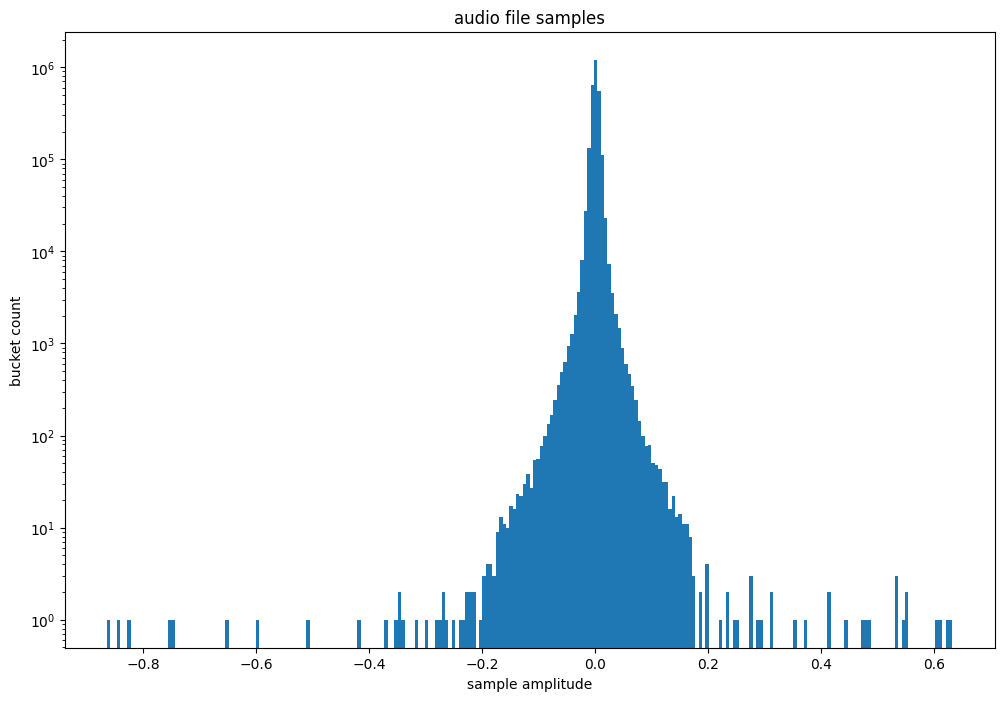

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_samples, bins=250, log=True)

ax.set_title("audio file samples")
ax.set_xlabel("sample amplitude")
ax.set_ylabel("bucket count")

plt.show()

In [14]:
pipe1 = FeaturePipeline.build_pipeline_1()
pipe2 = FeaturePipeline.build_pipeline_2(n_components=10)
pipe3 = FeaturePipeline.build_pipeline_3(n_components=10)

In [15]:
x1 = pipe1(audio_samples)
x2 = pipe2(audio_samples)
x3 = pipe3(audio_samples)

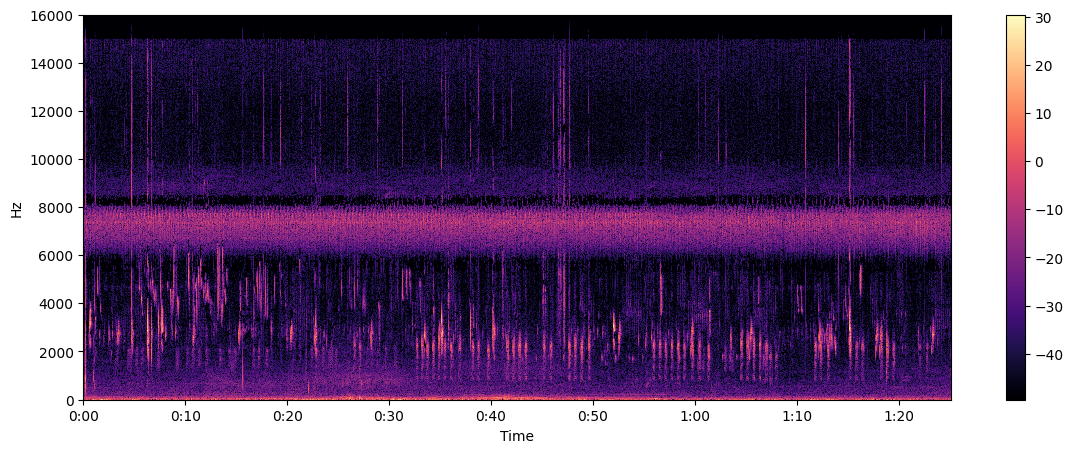

In [16]:
plt.figure(figsize=(14, 5))
specshow(x1, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [17]:
x1.shape

(1025, 5324)

In [18]:
f"{(x1.itemsize * x1.size) / 1e6}mb"

'21.8284mb'

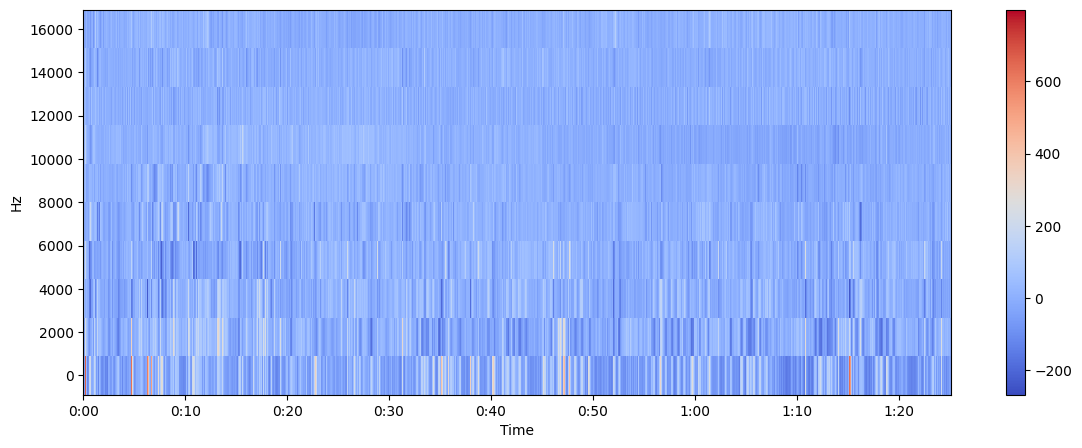

In [19]:
plt.figure(figsize=(14, 5))
specshow(x2, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [20]:
x2.shape

(10, 5324)

In [21]:
f"{(x2.itemsize * x2.size) / 1e6}mb"

'0.21296mb'

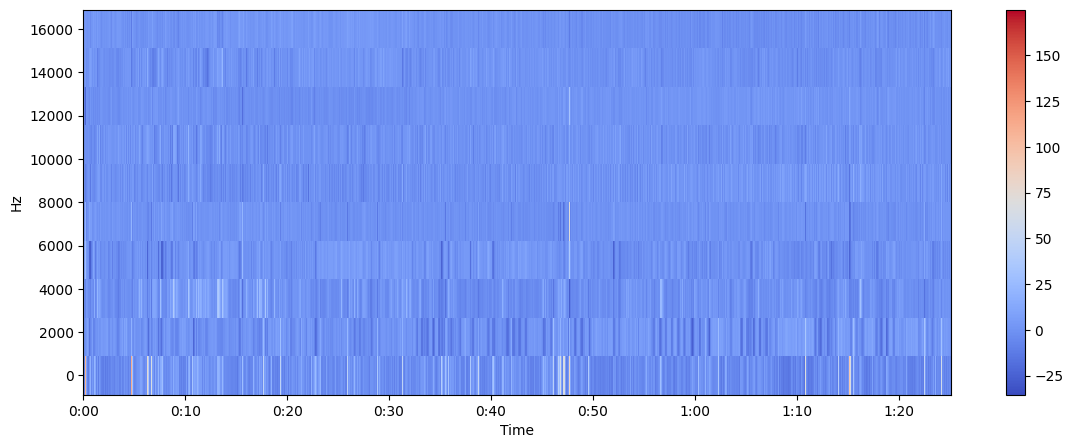

In [22]:
plt.figure(figsize=(14, 5))
specshow(x3, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [23]:
x3.shape

(10, 5324)

In [24]:
f"{(x3.itemsize * x3.size) / 1e6}mb"

'0.21296mb'

### test peak finding algorithm

In [25]:
cmap = ConstellationMap.from_spectrogram(spectrogram=x1, threshold=2.75)

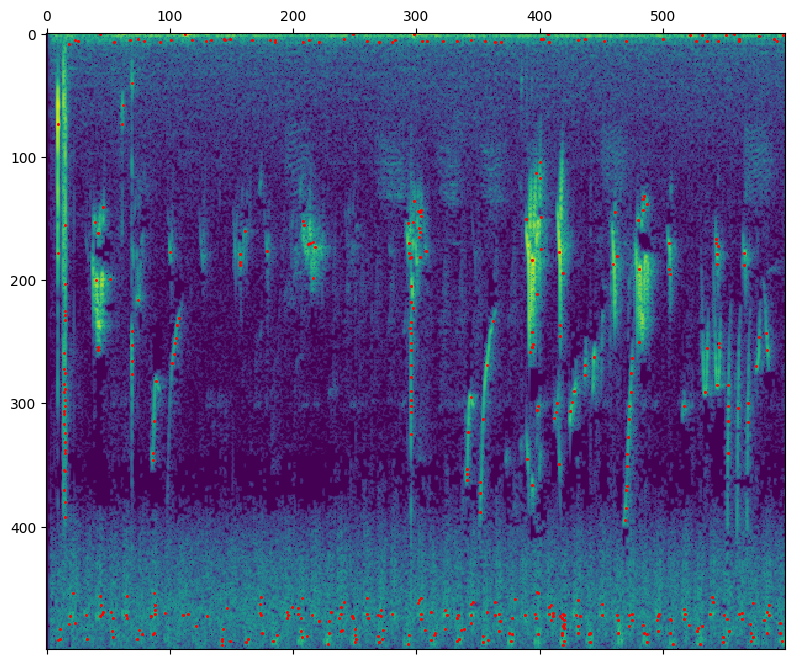

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=[p.x for p in cmap],
    y=[p.y for p in cmap],
    s=1.5,
    color="red"
)

ax.matshow(x1[:500, :600])

### test fingerprinting algorithm

In [27]:
fingerprints = cmap.fingerprints(
    label=random.label,
    region_size=250,
    hash_func=Fingerprint.HASH_FUNCTION
)

In [28]:
len(list(fingerprints))

709671

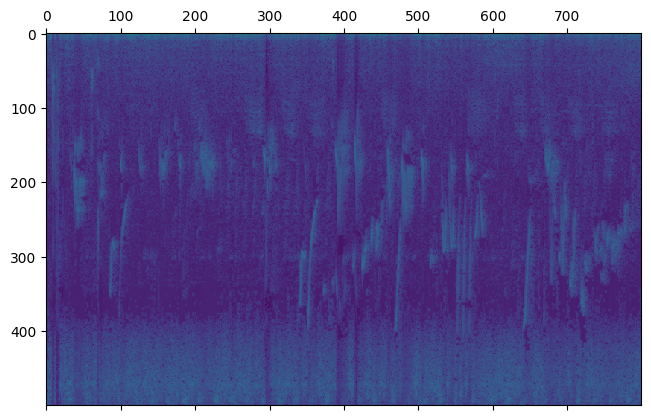

In [55]:
z1 = StandardScaler().fit_transform(x1)
plt.matshow(z1[:500, :800])

In [56]:
z1.shape

(1025, 5324)

In [60]:
p = PCA(n_components=100)
z2 = p.fit_transform(z1)
z2.shape

(1025, 500)

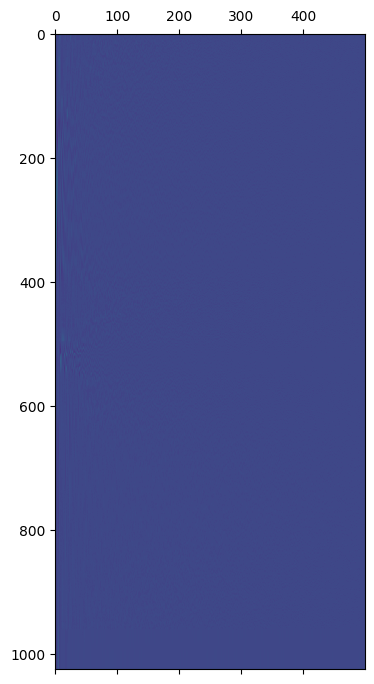

In [61]:
plt.matshow(z2)